<a href="https://colab.research.google.com/github/AhmedBuckets/SPS602/blob/main/assignment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**




______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [50]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#I've uploaded the file to my github page and will use read_csv from the pandas library to access it
movies = pd.read_csv('https://raw.githubusercontent.com/AhmedBuckets/SPS602/main/movies_initial.csv')

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [4]:
nRow, nCol = movies.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 46014 rows and 21 columns


In [5]:
movies.describe()

,imdbID,metacritic,imdbRating,imdbVotes
count,4.601400e+04,9401.000000,44300.000000,4.429900e+04
mean,8.552062e+05,56.896288,6.381454,1.180055e+04
std,1.141979e+06,17.715373,1.183113,4.934499e+04
min,1.000000e+00,1.000000,1.100000,5.000000e+00
25%,8.165750e+04,45.000000,5.800000,3.260000e+02
50%,2.524875e+05,58.000000,6.600000,9.990000e+02
75%,1.370868e+06,70.000000,7.200000,3.829000e+03
max,5.023260e+06,100.000000,9.600000,1.521105e+06


The column "runtime" is in string format, like so: "4 min". I want to extract just the time into a new column called "runtime_mins".

In [6]:
movies["runtime_mins"] = movies["runtime"].str.split(' ').str[0].fillna(0).replace(',','', regex=True).astype(int)
movies.describe()

,imdbID,metacritic,imdbRating,imdbVotes,runtime_mins
count,4.601400e+04,9401.000000,44300.000000,4.429900e+04,46014.000000
mean,8.552062e+05,56.896288,6.381454,1.180055e+04,91.577824
std,1.141979e+06,17.715373,1.183113,4.934499e+04,39.039508
min,1.000000e+00,1.000000,1.100000,5.000000e+00,0.000000
25%,8.165750e+04,45.000000,5.800000,3.260000e+02,84.000000
50%,2.524875e+05,58.000000,6.600000,9.990000e+02,94.000000
75%,1.370868e+06,70.000000,7.200000,3.829000e+03,106.000000
max,5.023260e+06,100.000000,9.600000,1.521105e+06,1256.000000


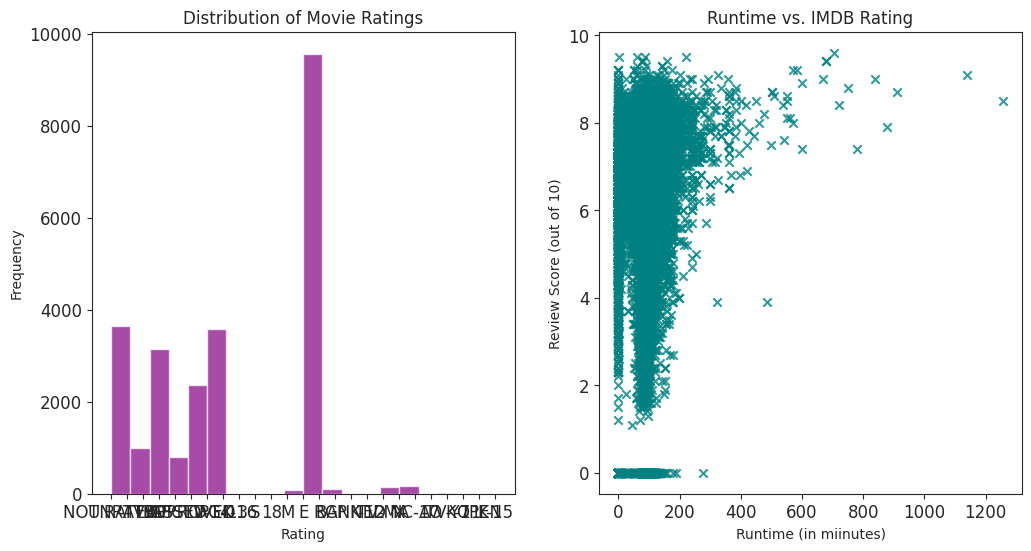

In [74]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Histogram of movie ratings
ax1.hist(movies['rating'].dropna(), bins=20, color='purple', alpha=0.7)
ax1.set_title('Distribution of Movie Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='both', labelsize=12)

# Plot 2: Scatter plot of movie budget vs. revenue

# Im filling the na's with 0 for now
ax2.scatter(movies['runtime_mins'].fillna(0), movies['imdbRating'].fillna(0), color='teal', alpha=0.8, marker='x', linewidth=1.5)

# Setting the title and axes lables 
ax2.set_title('Runtime vs. IMDB Rating')
ax2.set_xlabel('Runtime (in miinutes)')
ax2.set_ylabel('Review Score (out of 10)')
ax2.tick_params(axis='both', labelsize=12)

Above are two graphs. The first shows how frequent each individual appropriateness rating is. The second shows a correlation plot between runtime and user reviews. 

There are a few issues visually, so I will try and separate the two graphs to make them more clear. 

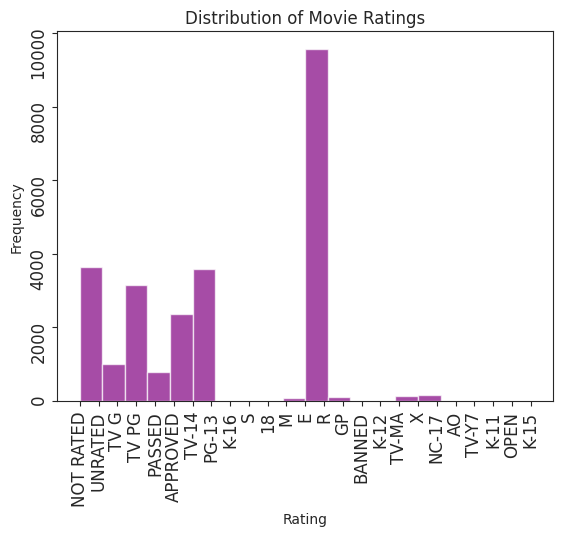

In [79]:
# Create a single figure
ax1 = plt.subplot()

# Plot 1: Histogram of movie ratings
ax1.hist(movies['rating'].dropna(), bins=20, color='purple', alpha=0.7)
ax1.set_title('Distribution of Movie Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='both', labelsize=12, rotation=90)


There are a lot of labels, and I can play around with the distances between labels to clean it up. However, I noticed that some of these labels should be merged (like TV-PG and PG). We can use replace to clean it up further. 

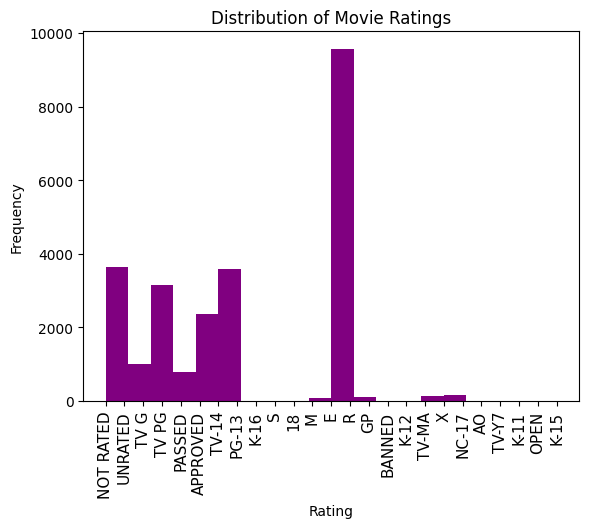

In [10]:
# Here I use Pandas replace() to combine the ratings that should be the same
movies["rating"] = movies["rating"].replace({'Not Rated':'NOT RATED',
                                              'Unrated':'UNRATED',
                                              'G':'TV G',
                                              'TV-G': 'TV G',
                                              'PG':'TV PG',
                                              'TV-PG':'TV PG',
                                             'Approved':'APPROVED',
                                             '(Banned)':'(BANNED)',
                                              '(BANNED)': 'BANNED'
                                              })
ax1 = plt.subplot()

# Re-plotting
ax1.hist(movies['rating'].dropna(), bins=20, color='purple')
ax1.set_title('Distribution of Movie Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', labelsize=11, rotation=90,)

We can do the same for the scatter plot to better visually discern any patterns. 


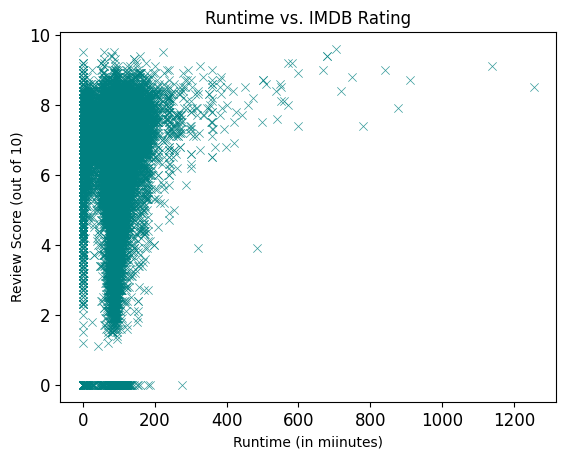

In [15]:
# Make a new plot
ax2 = plt.subplot()

# Using the same colors and title/labels
ax2.scatter(movies['runtime_mins'].fillna(0), movies['imdbRating'].fillna(0), color='teal', alpha=0.8, marker='x', linewidth=.5)
ax2.set_title('Runtime vs. IMDB Rating')
ax2.set_xlabel('Runtime (in miinutes)')
ax2.set_ylabel('Review Score (out of 10)')
ax2.tick_params(axis='both', labelsize=12)

It looks like some very long movies (400 minutes = almost 7 hours) will potentially skew the data. I will assume anything over 200 minutes is an outlier and modify the data accordingly. 

I will also change the label size to be more granular.

AttributeError: ignored

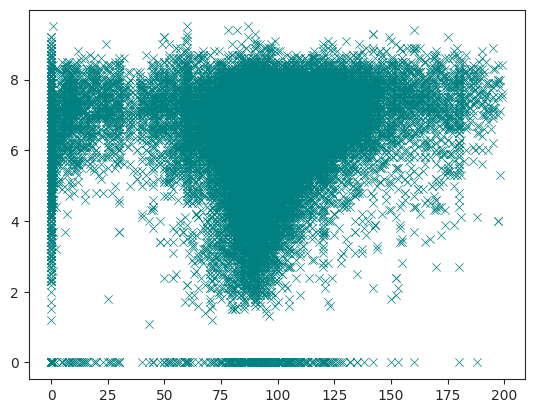

In [86]:
# Filter the data frame 
filtered_movies = movies[movies['runtime_mins'] <200]

# Plot using the same settings
# This time to create the scatter I won't use subplot
ax3 = plt.scatter(filtered_movies['runtime_mins'].fillna(0), filtered_movies['imdbRating'].fillna(0), color='teal', marker='x', linewidth=.5)
plt.title('Runtime vs. IMDB Rating')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Review Score (out of 10)')

# Changing the label size to make room for more labels
plt.tick_params(axis='both', labelsize=9)

# Manually adding more labels 
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(0, 200, 20))

#Re-creation in Seaborn
I will recreate these in Seaborn: 

<ipython-input-83-6d4ada58ffc2>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(labels = a.get_xticklabels(), rotation=90)


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Rating')]

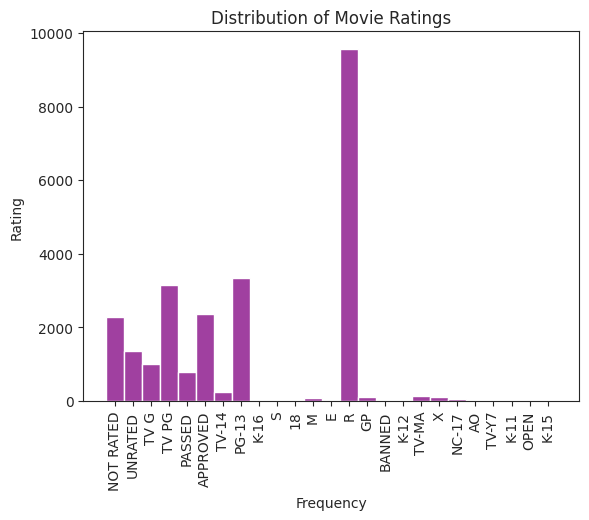

In [83]:
import seaborn as sns
movies["rating"] = movies["rating"].replace({'Not Rated':'NOT RATED',
                                              'Unrated':'UNRATED',
                                              'G':'TV G',
                                              'TV-G': 'TV G',
                                              'PG':'TV PG',
                                              'TV-PG':'TV PG',
                                             'Approved':'APPROVED',
                                             '(Banned)':'(BANNED)',
                                              '(BANNED)': 'BANNED'
                                              })
# sns.histplot quickly makes a histogram for us
a = sns.histplot(data=movies, x='rating', color = 'purple')

# resetting the x-axis labels and rotating them again
a.set_xticklabels(labels = a.get_xticklabels(), rotation=90)

# Setting the title
a.set_title('Distribution of Movie Ratings')
a.set( xlabel ='Frequency', 
    ylabel = 'Rating')

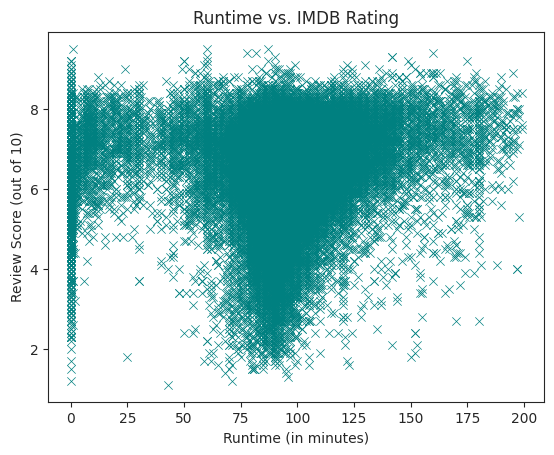

In [84]:
filtered_movies = movies[movies['runtime_mins'] < 200]

# Seaborn also lets us make a quick scatterplot
# We can set the title and labels immediately
sns.scatterplot(data=filtered_movies, x='runtime_mins', y='imdbRating', color='teal', marker='x', linewidth=.5).set(
    title='Runtime vs. IMDB Rating',
    xlabel ='Runtime (in minutes)', 
    ylabel = 'Review Score (out of 10)')
sns.set_style("ticks")


Making the plots in Seaborn is fairly similar to making them in Matplotlib in the outset- declaring the type of plot is easy enough. However the differences are noticed when it comes to changing the labels and title- it is a little more easy in seaborn. 

# Conclusions  
From the data we can immediately see from the histogram that the most frequent rating is E. Not surprisingly, PG and PG-13 are right behind it, but I'm surprised that there aren't many G movies.

It's a little harder to glean anything immediately from the scatterplot- there doesn't seem to be correlation betweem runtime and user rating. 